___
# Ciência dos Dados - PROJETO 1

## Dennis Zaramelo Felex
___

## Análise de Segurança Alimentar no Estado de São Paulo - 2009 e 2013

___
## Introdução

    A Segurança Alimentar consiste, segundo o Site do Governo Federal, consiste na realização do direito de todos ao acesso regular e permanente a alimentos de qualidade, em quantidade suficiente, sem comprometer o acesso a outras necessidades essenciais, tendo como base práticas alimentares promotoras da saúde, que respeitem a diversidade cultural e que sejam ambiental, cultural, econômica e socialmente sustentáveis. 
    Apresentado seu significado, esse termo será o foco da análise da base de dados PNAD dos anos de 2009 e 2013, visando obter informações acerca da segurança alimentar no estado de São Paulo, 1° colocado no quesito PIB entre os estados do país. Será que tamanha produção é revertida em condições adequadas de vida para toda a população do estado? 
    Além disso, há o objetivo de se comparar os resultados obtidos com a análise das duas bases de dados, verificando então se houve mudanças acerca da população "segura", no quesito alimentação. 
    
    Fonte: http://www4.planalto.gov.br/consea/acesso-a-informacao/institucional/conceitos

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import os

In [2]:
#carregando a base de dados
dados2009 = pd.read_table("DOM2009.csv", encoding="windows-1252", sep=",")

dados2013 = pd.read_table("DOM2013.csv", encoding="windows-1252", sep=",")


In [3]:
#tamanho da base de dados
print(dados2009.shape)
print(dados2013.shape)

(153837, 98)
(148697, 99)


In [4]:
#criando as categorias
dados2009.V0201 = dados2009.V0201.astype('category')
dados2009.V4105 = dados2009.V4105.astype('category')
dados2009.V2103 = dados2009.V2103.astype('category')
dados2009.V2105 = dados2009.V2105.astype('category')
dados2009.V2107 = dados2009.V2107.astype('category')
dados2009.V2109 = dados2009.V2109.astype('category')

dados2013.V0201 = dados2013.V0201.astype('category')
dados2013.V4105 = dados2013.V4105.astype('category')
dados2013.V2103 = dados2013.V2103.astype('category')
dados2013.V2105 = dados2013.V2105.astype('category')
dados2013.V2107 = dados2013.V2107.astype('category')
dados2013.V2109 = dados2013.V2109.astype('category')

In [5]:
#Conversão legenda - Descrição 
dados2009.V0201.cat.categories = ('Particular Permanente','Particular Improvisado','Coletivo')
dados2009.V4105.cat.categories = ('URBANA - Cidade ou vila, área urbanizada','URBANA - Cidade ou vila, área não urbanizada','URBANA - Área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural')
dados2009.V2103.cat.categories = ('Sim','Não')
dados2009.V2105.cat.categories = ('Sim','Não')
dados2009.V2107.cat.categories = ('Sim','Não')
dados2009.V2109.cat.categories = ('Sim','Não')

dados2013.V0201.cat.categories = ('Particular Permanente','Particular Improvisado','Coletivo')
dados2013.V4105.cat.categories = ('URBANA - Cidade ou vila, área urbanizada','URBANA - Cidade ou vila, área não urbanizada','URBANA - Área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural')
dados2013.V2103.cat.categories = ('Sim','Não')
dados2013.V2105.cat.categories = ('Sim','Não')
dados2013.V2107.cat.categories = ('Sim','Não')
dados2013.V2109.cat.categories = ('Sim','Não')

In [6]:
#1° recorte: estado de são paulo
tabsp2009 = dados2009[dados2009.UF==35]

tabsp2013 = dados2013[dados2013.UF==35]

In [7]:
#visualizando todas as colunas disponíveis na base de dados (verificar dicionário para identificação de cada coluna) 
print(list(tabsp2009))

print(list(tabsp2013))

['Unnamed: 0', 'V0101', 'UF', 'V0102', 'V0103', 'V0104', 'V0105', 'V0106', 'V0201', 'V0202', 'V0203', 'V0204', 'V0205', 'V0206', 'V0207', 'V0208', 'V0209', 'V0210', 'V0211', 'V0212', 'V0213', 'V0214', 'V0215', 'V0216', 'V2016', 'V0217', 'V0218', 'V0219', 'V0220', 'V2020', 'V0221', 'V0222', 'V0223', 'V0224', 'V0225', 'V0226', 'V0227', 'V2027', 'V0228', 'V0229', 'V0230', 'V0231', 'V0232', 'V2032', 'V4105', 'V4106', 'V4107', 'V4600', 'V4601', 'V4602', 'V4604', 'V4605', 'V4606', 'V4607', 'V4608', 'V4609', 'V4610', 'V4611', 'V4614', 'UPA', 'V4617', 'V4618', 'V4619', 'V4620', 'V4621', 'V4622', 'V4623', 'V4624', 'V2101', 'V2102', 'V2103', 'V2105', 'V2107', 'V2109', 'V2111', 'V2113', 'V2115', 'V2117', 'V2119', 'V2120', 'V2121', 'V2123', 'V2124', 'V2126', 'V2128', 'V2130', 'V2132', 'V2134', 'V2136', 'V2033', 'V2034', 'V2035', 'V2036', 'V2037', 'V2038', 'V2039', 'V2041', 'V9992']
['Unnamed: 0', 'V0101', 'UF', 'V0102', 'V0103', 'V0104', 'V0105', 'V0106', 'V0201', 'V0202', 'V0203', 'V0204', 'V0205

In [8]:
#corte da base de dados, pegando apenas as colunas desejadas
tabspcortada2009 = tabsp2009.iloc[:,[6,8,44,58,70,71,72,73]]

tabspcortada2013 = tabsp2013.iloc[:,[6,8,59,72,81,82,83,84]]

In [9]:
#retirando valores indefinidos
tabsprenda2009 = tabspcortada2009[(tabspcortada2009.V4614 != 999999999999)]
tabsprenda2009.dropna()

tabsprenda2013 = tabspcortada2013[(tabspcortada2013.V4614 != 999999999999)]
tabsprenda2013.dropna()

,V0105,V0201,V4105,V4614,V2103,V2105,V2107,V2109
91640,1.0,Particular Permanente,"URBANA - Cidade ou vila, área urbanizada",0.0,Não,Não,Não,Não
91642,3.0,Particular Permanente,"URBANA - Cidade ou vila, área urbanizada",2500.0,Não,Não,Não,Não
91644,3.0,Particular Permanente,"URBANA - Cidade ou vila, área urbanizada",1050.0,Sim,Sim,Sim,Sim
91645,2.0,Particular Permanente,"URBANA - Cidade ou vila, área urbanizada",2200.0,Não,Não,Não,Não
91646,2.0,Particular Permanente,"URBANA - Cidade ou vila, área urbanizada",1900.0,Sim,Não,Não,Não
91647,1.0,Particular Permanente,"URBANA - Cidade ou vila, área urbanizada",2000.0,Não,Não,Não,Não
91648,2.0,Particular Permanente,"URBANA - Cidade ou vila, área urbanizada",1860.0,Não,Não,Não,Não
91650,1.0,Particular Permanente,"URBANA - Cidade ou vila, área urbanizada",2000.0,Não,Não,Não,Não
91654,2.0,Particular Permanente,"URBANA - Cidade ou vila, área urbanizada",1300.0,Não,Não,Não,Não
91655,5.0,Particular Permanente,"URBANA - Cidade ou vila, área urbanizada",2060.0,Não,Não,Não,Não


In [10]:
#analisando numericamente
#Moradores
contmora2009 = (tabsprenda2009.V0105.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contmora2009)

contmora2013 = (tabsprenda2013.V0105.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contmora2013)

#ordenar de acordo com o número de moradores
contmora2009.sort_index(inplace=True)
contmora2013.sort_index(inplace=True)

2.0     24.28
4.0     22.56
1.0     12.66
3.0     25.27
6.0      3.48
8.0      0.51
12.0     0.02
16.0     0.01
9.0      0.28
5.0      9.56
15.0     0.01
10.0     0.08
7.0      1.22
14.0     0.01
11.0     0.06
Name: V0105, dtype: float64
1.0     14.70
3.0     26.59
2.0     25.74
5.0      8.47
6.0      2.86
4.0     19.75
7.0      1.15
8.0      0.46
10.0     0.08
14.0     0.02
16.0     0.01
12.0     0.01
17.0     0.01
11.0     0.03
9.0      0.12
15.0     0.01
Name: V0105, dtype: float64


In [11]:
#Quanto a moradia
contcasa2009 = (tabsprenda2009.V0201.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contcasa2009)

contcasa2013 = (tabsprenda2013.V0201.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contcasa2013)

Particular Permanente     99.80
Particular Improvisado     0.05
Coletivo                   0.15
Name: V0201, dtype: float64
Particular Permanente     99.64
Particular Improvisado     0.25
Coletivo                   0.11
Name: V0201, dtype: float64


In [12]:
#Quanto a zona
contzona2009 = (tabsprenda2009.V4105.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contzona2009)

contzona2013 = (tabsprenda2013.V4105.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contzona2013)

URBANA - Cidade ou vila, área urbanizada                 91.37
URBANA - Cidade ou vila, área não urbanizada              0.69
URBANA - Área urbana isolada                              0.94
RURAL - Aglomerado rural de extensão urbana               1.03
RURAL - Aglomerado rural, isolado, povoado                0.10
RURAL - Aglomerado rural, isolado, núcleo                 0.00
RURAL - Aglomerado rural, isolado, outros aglomerados     0.12
RURAL - Zona rural exclusive aglomerado rural             5.74
Name: V4105, dtype: float64
URBANA - Cidade ou vila, área urbanizada                 92.86
URBANA - Cidade ou vila, área não urbanizada              1.81
URBANA - Área urbana isolada                              1.25
RURAL - Aglomerado rural de extensão urbana               0.33
RURAL - Aglomerado rural, isolado, povoado                0.00
RURAL - Aglomerado rural, isolado, núcleo                 0.00
RURAL - Aglomerado rural, isolado, outros aglomerados     0.12
RURAL - Zona rural exclusiv

In [13]:
#Os moradores tiveram a preocupação de que os alimentos acabassem antes de poderem comprar ou receber mais comida
contprec2009 = (tabsprenda2009.V2103.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contprec2009)

contprec2013 = (tabsprenda2013.V2103.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contprec2013)



Sim    19.43
Não    80.57
Name: V2103, dtype: float64
Sim    10.01
Não    89.99
Name: V2103, dtype: float64


In [14]:
#Os alimentos acabaram antes que os moradores deste domicílio tivessem dinheiro para comprar mais comida
contal2009 = (tabsprenda2009.V2105.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contal2009)

contal2013 = (tabsprenda2013.V2105.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contal2013)


Sim    10.45
Não    89.55
Name: V2105, dtype: float64
Sim     5.72
Não    94.28
Name: V2105, dtype: float64


In [15]:
#Os moradores ficaram sem dinheiro para ter uma alimentação saudável e variada
contsem2009 = (tabsprenda2009.V2107.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contsem2009)

contsem2013 = (tabsprenda2013.V2107.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contsem2013)

Sim    13.24
Não    86.76
Name: V2107, dtype: float64
Sim     7.17
Não    92.83
Name: V2107, dtype: float64


In [16]:
#Os moradores deste domicílio comeram apenas alguns alimentos que ainda tinham porque o dinheiro acabou
contpouco2009 = (tabsprenda2009.V2109.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contpouco2009)

contpouco2013 = (tabsprenda2013.V2109.value_counts(sort=False, normalize=True)*100).round(decimals=2)
print(contpouco2013)


Sim    12.22
Não    87.78
Name: V2109, dtype: float64
Sim     6.3
Não    93.7
Name: V2109, dtype: float64


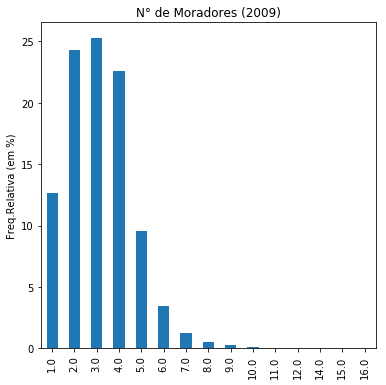

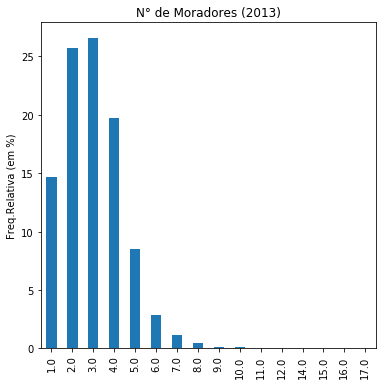

In [17]:
# Gráficos
plot = contmora2009.plot(kind='bar',title='N° de Moradores (2009)',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

plot = contmora2013.plot(kind='bar',title='N° de Moradores (2013)',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()


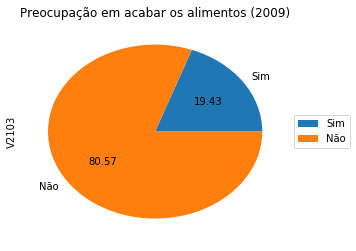

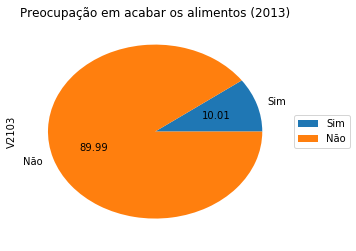

In [18]:
plot = contprec2009.plot(kind='pie',title='Preocupação em acabar os alimentos (2009)',autopct='%.2f')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plot = contprec2013.plot(kind='pie',title='Preocupação em acabar os alimentos (2013)',autopct='%.2f')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

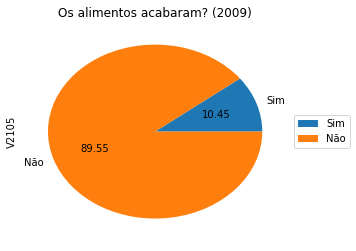

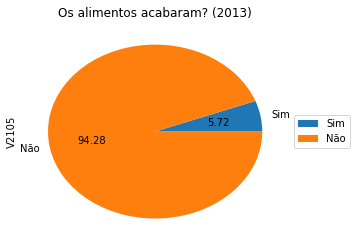

In [19]:
plot = contal2009.plot(kind='pie',title='Os alimentos acabaram? (2009)',autopct='%.2f')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plot = contal2013.plot(kind='pie',title='Os alimentos acabaram? (2013)',autopct='%.2f')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

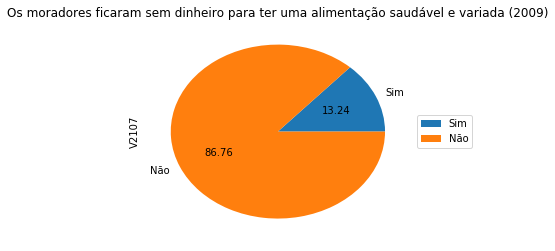

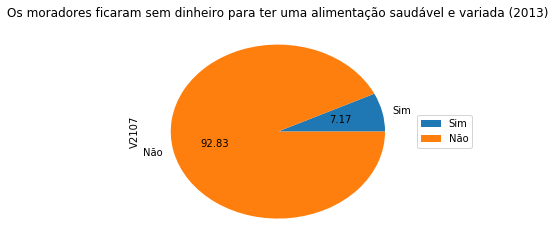

In [20]:
plot = contsem2009.plot(kind='pie',title='Os moradores ficaram sem dinheiro para ter uma alimentação saudável e variada (2009)',autopct='%.2f')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plot = contsem2013.plot(kind='pie',title='Os moradores ficaram sem dinheiro para ter uma alimentação saudável e variada (2013)',autopct='%.2f')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

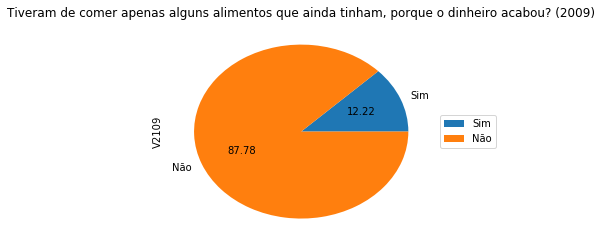

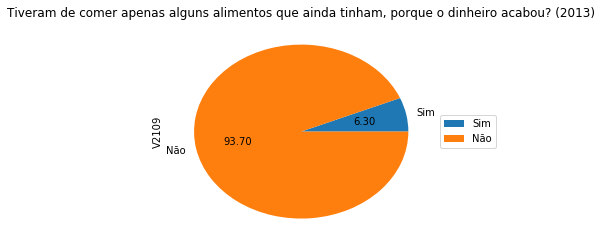

In [21]:
plot = contpouco2009.plot(kind='pie',title='Tiveram de comer apenas alguns alimentos que ainda tinham, porque o dinheiro acabou? (2009)',autopct='%.2f')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plot = contpouco2013.plot(kind='pie',title='Tiveram de comer apenas alguns alimentos que ainda tinham, porque o dinheiro acabou? (2013)',autopct='%.2f')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [22]:
#análise de renda
tabsprenda2009.V4614.describe()
faixar = arange(0,11000,1000)
renda2009 = pd.cut(tabsprenda2009.V4614, bins=faixar, right=False)
barras2009 = (renda2009.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(barras2009)

tabsprenda2013.V4614.describe()
faixar = arange(0,11000,1000)
renda2013 = pd.cut(tabsprenda2013.V4614, bins=faixar, right=False)
barras2013 = (renda2013.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(barras2013)

[0, 1000)        26.4
[1000, 2000)     32.8
[2000, 3000)     18.7
[3000, 4000)      8.8
[4000, 5000)      5.0
[5000, 6000)      3.2
[6000, 7000)      2.1
[7000, 8000)      1.2
[8000, 9000)      1.1
[9000, 10000)     0.6
Name: V4614, dtype: float64
[0, 1000)        13.7
[1000, 2000)     27.5
[2000, 3000)     22.9
[3000, 4000)     14.1
[4000, 5000)      8.1
[5000, 6000)      5.1
[6000, 7000)      3.4
[7000, 8000)      2.4
[8000, 9000)      1.8
[9000, 10000)     1.2
Name: V4614, dtype: float64


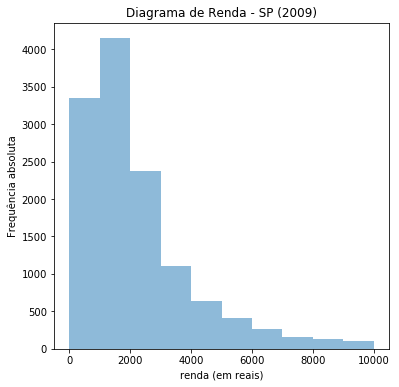

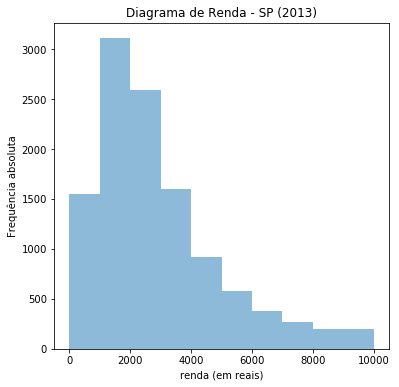

In [23]:
#histogramas de renda
plot = tabsprenda2009.V4614.plot.hist(bins=faixar, title='Diagrama de Renda - SP (2009)', figsize=(6,6), alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')
plt.show()

plot = tabsprenda2013.V4614.plot.hist(bins=faixar, title='Diagrama de Renda - SP (2013)', figsize=(6,6), alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')
plt.show()

___
## Conclusão 

Descreva aqui suas conclusões!

para fins de estimativas, pegou-se dados do tamanho da população do estado no IBGE e SEADE:
http://www.ibge.gov.br/estadosat/perfil.php?sigla=sp
http://www.bibliotecavirtual.sp.gov.br/temas/sao-paulo/sao-paulo-populacao-do-estado.php